In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep=';') # public dataset available at: http://dx.doi.org/10.1016/j.jbusres.2016.02.010

In [3]:
df.max()

Page total likes                                                        139441
Type                                                                     Video
Category                                                                     3
Post Month                                                                  12
Post Weekday                                                                 7
Post Hour                                                                   23
Paid                                                                         1
Lifetime Post Total Reach                                               180480
Lifetime Post Total Impressions                                        1110282
Lifetime Engaged Users                                                   11452
Lifetime Post Consumers                                                  11328
Lifetime Post Consumptions                                               19779
Lifetime Post Impressions by people who have liked y

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [5]:
mes = df['Post Month']

mes

In [6]:
mes.head()

0    12
1    12
2    12
3    12
4    12
Name: Post Month, dtype: int64

In [7]:
like = df['like']

In [5]:
df['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [6]:
def classe(tipo):
    if tipo == 'Video':
        return '1'
    elif tipo == 'Status':
        return '2'
    elif tipo == 'Link':
        return '3'
    elif tipo == 'Photo':
        return '4'

In [7]:
df['tipos'] = df['Type'].apply(classe)

In [8]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,tipos
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,4
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,2
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,4
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,4
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,4


In [48]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,tipo,value
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,159,3078,1640,119,4,79.0,17.0,100,None,None
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,1674,11710,6112,1108,5,130.0,29.0,164,None,None
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,...,154,2812,1503,132,0,66.0,14.0,80,None,None
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,...,1119,61027,32048,1386,58,1572.0,147.0,1777,None,None
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,...,580,6228,3200,396,19,325.0,49.0,393,None,None


In [8]:
like.head()

0      79.0
1     130.0
2      66.0
3    1572.0
4     325.0
Name: like, dtype: float64

## Gráficos

plt.bar (mes, like)
plt.xlabel('mês')
plt.ylabel('Likes')
plt.title('Likes por Mês')
plt.grid(True)
plt.show()

In [9]:
comment = df['comment']

In [15]:
tipos = df['tipos']

In [14]:
engajados = df['Lifetime Post Consumers']

In [18]:
tiposnome = 'fotos', 'Status', 'Link', 'Video'

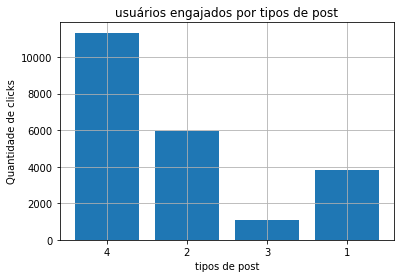

In [22]:
plt.bar (tipos, engajados)
plt.xlabel('tipos de post')
plt.ylabel('Quantidade de clicks')
plt.title('usuários engajados por tipos de post')
plt.grid(True)
plt.show()

In [61]:
mes_1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

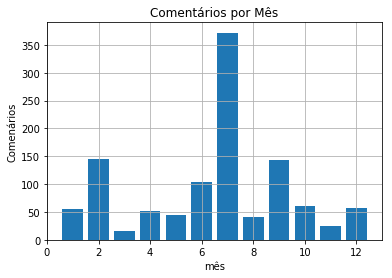

In [63]:
plt.bar (mes, comment)
plt.xlabel('mês')
plt.ylabel('Comenários')
plt.title('Comentários por Mês')
plt.grid(True)
plt.show()

In [11]:
share = df['share']

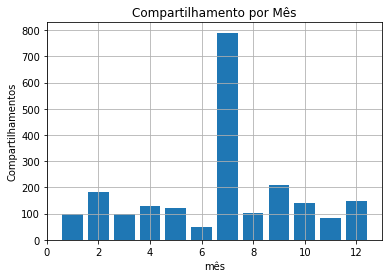

In [12]:
plt.bar (mes, share)
plt.xlabel('mês')
plt.ylabel('Compartilhamentos')
plt.title('Compartilhamento por Mês')
plt.grid(True)
plt.show()

In [13]:
interacoes = df['Total Interactions']

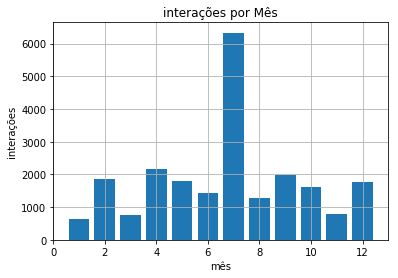

In [14]:
plt.bar (mes, interacoes)
plt.xlabel('mês')
plt.ylabel('interações')
plt.title('interações por Mês')
plt.grid(True)
plt.show()

In [15]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [16]:
df.nlargest(5,'like') # as cinco maiores quantidades de Likes

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
379,111620,Photo,3,4,1,14,1.0,105632,147918,3984,2254,3391,48575,27328,1936,51,1998.0,128.0,2177
349,117764,Photo,3,5,5,13,0.0,81856,124753,3000,1637,2718,52477,27392,1756,45,1639.0,122.0,1806
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777


In [17]:
df.nlargest(5,'comment') # as cinco maiores quantidades de comentários

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
288,126141,Photo,1,6,4,12,0.0,20896,29062,1418,1038,2048,19738,13656,998,103,469.0,33.0,605
228,131728,Photo,2,7,4,3,0.0,14824,21863,868,591,966,13498,8560,650,64,367.0,25.0,456


In [18]:
users_paid = df['Paid'].value_counts(1)

In [19]:
users_paid #72,14% dos usuários não pagaram por propaganda e 27,85% optaram por pagar

0.0    0.721443
1.0    0.278557
Name: Paid, dtype: float64

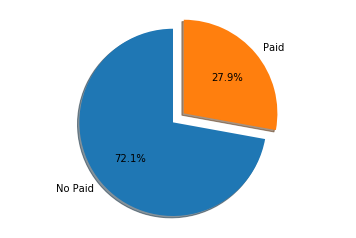

In [20]:
labels = 'No Paid', 'Paid'
explode = (0.15, 0.0)


fig1, ax1 = plt.subplots()
ax1.pie(users_paid, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [21]:
Type = df['Type']

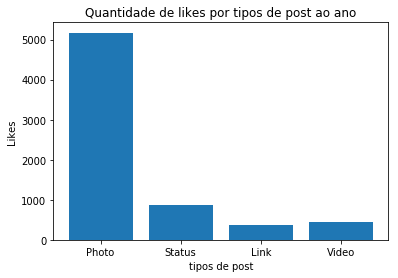

In [22]:
plt.bar (Type, like)
plt.xlabel('tipos de post')
plt.ylabel('Likes')
plt.title('Quantidade de likes por tipos de post ao ano')
plt.show()

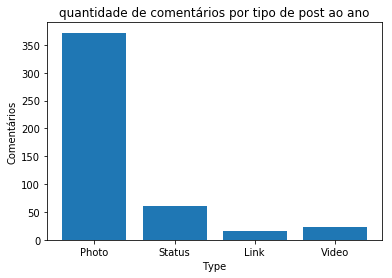

In [23]:
plt.bar (Type, comment)
plt.xlabel('Type')
plt.ylabel('Comentários')
plt.title('quantidade de comentários por tipo de post ao ano')
plt.show()

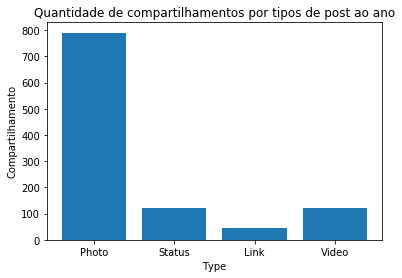

In [24]:
plt.bar (Type, share)
plt.xlabel('Type')
plt.ylabel('Compartilhamento')
plt.title('Quantidade de compartilhamentos por tipos de post ao ano')
plt.show()

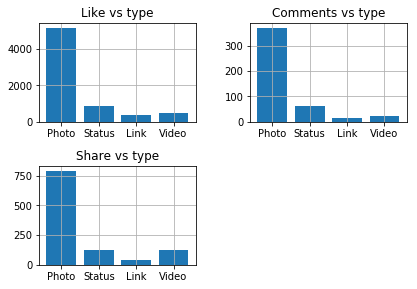

In [25]:
plt.figure(1)

# like
plt.subplot(221)
plt.bar(Type, like)
plt.yscale('linear')
plt.title('Like vs type')
plt.grid(True)


# comment
plt.subplot(222)
plt.bar(Type, comment)
plt.title('Comments vs type')
plt.grid(True)


# Share
plt.subplot(223)
plt.bar(Type, share)
plt.title('Share vs type')
plt.grid(True)


plt.grid(True)
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)

plt.show()

In [26]:
total_like = like.sum()

In [27]:
total_comment = comment.sum()

In [28]:
total_share = share.sum()

In [29]:
graf3 = [total_like, total_comment, total_share]

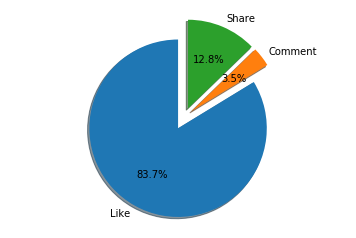

In [30]:
labels = 'Like', 'Comment', 'Share'
explode = (0.15, 0.1, 0.1)


fig1, ax1 = plt.subplots()
ax1.pie(graf3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [31]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [32]:
semana = df['Post Weekday']

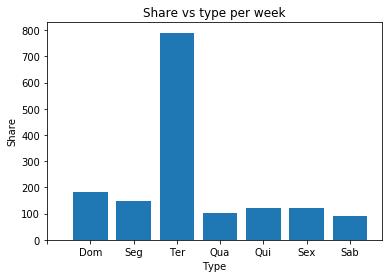

In [33]:
dias = ['', 'Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab']
ypos = np.arange(len(dias))
plt.bar (semana, share)
plt.xlabel('Type')
plt.ylabel('Share')
plt.title('Share vs type per week')
plt.xticks(ypos, dias)
plt.show()

In [34]:
df.nlargest(5, 'comment')

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
288,126141,Photo,1,6,4,12,0.0,20896,29062,1418,1038,2048,19738,13656,998,103,469.0,33.0,605
228,131728,Photo,2,7,4,3,0.0,14824,21863,868,591,966,13498,8560,650,64,367.0,25.0,456


In [25]:
n_largest = df.nlargest(10, 'Total Interactions' )

In [26]:
n_largest

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,tipos
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334,4
379,111620,Photo,3,4,1,14,1.0,105632,147918,3984,2254,3391,48575,27328,1936,51,1998.0,128.0,2177,4
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974,4
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873,4
349,117764,Photo,3,5,5,13,0.0,81856,124753,3000,1637,2718,52477,27392,1756,45,1639.0,122.0,1806,4
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,4
101,137020,Photo,2,10,4,3,0.0,68896,104952,2624,1326,1952,35707,19840,1354,26,1505.0,95.0,1626,4
323,123047,Photo,3,6,1,10,0.0,56672,104966,2579,1334,1850,78678,37408,1831,20,1372.0,47.0,1439,4
199,132817,Photo,3,8,4,10,0.0,33536,64850,1954,1016,1678,50076,24448,1564,33,1155.0,102.0,1290,4
176,135195,Photo,3,9,6,3,1.0,22304,37159,1805,984,1618,22864,13304,1349,29,1047.0,98.0,1174,4


In [27]:
maiores_mes = n_largest['Post Month']

In [28]:
maiores_mes

244     7
379     4
168     9
460     2
349     5
3      12
101    10
323     6
199     8
176     9
Name: Post Month, dtype: int64

In [30]:
maiores = n_largest ['Total Interactions']

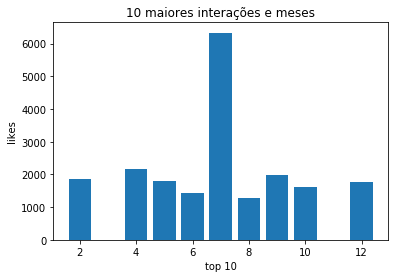

In [32]:
plt.bar (maiores_mes, maiores)
plt.xlabel('top 10')
plt.ylabel('likes')
plt.title('10 maiores interações e meses')
plt.show()

In [40]:
julho = df.loc[df['Post Month'] == 7]

In [41]:
julho.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,tipos
225,131808,Status,2,7,5,14,0.0,15296,25269,2827,2781,3627,22103,13296,2602,9,95.0,17.0,121,2
226,131728,Photo,3,7,5,8,1.0,3414,6369,473,342,525,4518,2390,360,3,188.0,26.0,217,4
227,131728,Photo,1,7,4,10,1.0,95424,252207,699,575,882,78287,22016,417,6,109.0,11.0,126,4
228,131728,Photo,2,7,4,3,0.0,14824,21863,868,591,966,13498,8560,650,64,367.0,25.0,456,4
229,131630,Photo,2,7,3,13,0.0,3504,5699,444,374,497,4487,2730,348,9,102.0,19.0,130,4


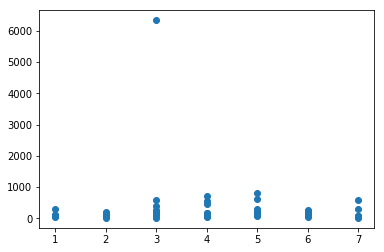

In [43]:
plt.scatter (julho['Post Weekday'] , julho['Total Interactions'])

In [38]:
Type.value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [7]:
photo = df['Type'] == 'Photo'

In [8]:
photo.head()

0     True
1    False
2     True
3     True
4     True
Name: Type, dtype: bool

In [40]:
status = df['Type'] == 'Status'

In [41]:
Link = df['Type'] == 'Link'

In [42]:
video = df['Type'] == 'Video'

In [43]:
graf4 = [photo, status, Link, video]

In [44]:
photo_soma = photo.sum()

In [45]:
status_soma = status.sum()

In [46]:
link_soma = Link.sum()

In [47]:
video_soma = video.sum()

In [48]:
graf4 = [photo_soma, status_soma, link_soma, video_soma]

In [5]:
labels = 'photo', 'status', 'link', 'video'

In [6]:
plt.bar (graf4, labels)

NameError: name 'graf4' is not defined

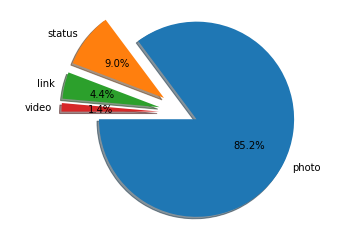

In [49]:
labels = 'photo', 'status', 'link', 'video'
explode = (0.15, 0.25, 0.25, 0.25)


fig1, ax1 = plt.subplots()
ax1.pie(graf4, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal') 

plt.show()

In [50]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [51]:
lifetime = df['Lifetime People who have liked your Page and engaged with your post']

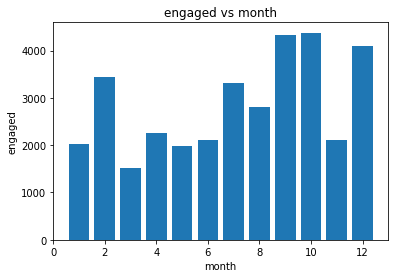

In [52]:
plt.bar (mes, lifetime)
plt.xlabel('month')
plt.ylabel('engaged')
plt.title('engaged vs month')
plt.show()

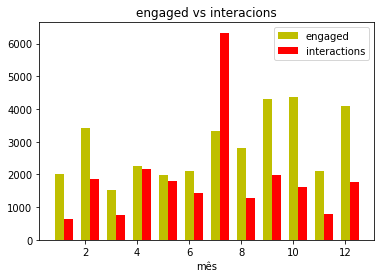

In [53]:
fig, ax = plt.subplots()


bar_width = 0.35

error_config = {'ecolor': '0.3'}

rects1 = ax.bar(mes, lifetime, bar_width,
                color='y', 
                error_kw=error_config,
                label='engaged')

rects2 = ax.bar(mes + bar_width, interacoes, bar_width,
                color='r',
                error_kw=error_config,
                label='interactions')

ax.set_xlabel('mês')
ax.set_title('engaged vs interacions')

ax.legend()


plt.show()

In [54]:
df['value'] = (df['Total Interactions']>= 500)

In [55]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,value
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,False
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,False
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,False
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,True
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,False


In [41]:
def categoriza(s):
    if s == 'Video':
       return '1'
    elif s == 'Status':
       return '2'
  

In [42]:
df['value'] = df['Total Interactions'].apply(categoriza)

In [43]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,tipo,value
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,159,3078,1640,119,4,79.0,17.0,100,None,None
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,1674,11710,6112,1108,5,130.0,29.0,164,None,None
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,...,154,2812,1503,132,0,66.0,14.0,80,None,None
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,...,1119,61027,32048,1386,58,1572.0,147.0,1777,None,None
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,...,580,6228,3200,396,19,325.0,49.0,393,None,None


In [44]:
valores = df['value'].value_counts(1)

In [45]:
valores

Series([], Name: value, dtype: float64)

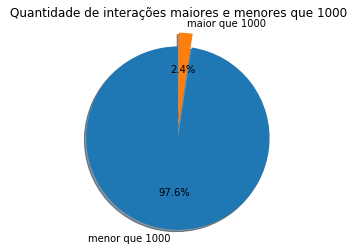

In [60]:
labels = 'menor que 1000', 'maior que 1000'
explode = (0.15, 0.0)


fig1, ax1 = plt.subplots()
ax1.pie(valores, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Quantidade de interações maiores e menores que 1000')

plt.show()